# Clustering

Clustering is an unsupervised learning technique useful to find similarity amongst data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load and plot data

In [3]:
df = pd.read_csv('../data/iris.csv')

In [4]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0,0.5,'Petal Length')

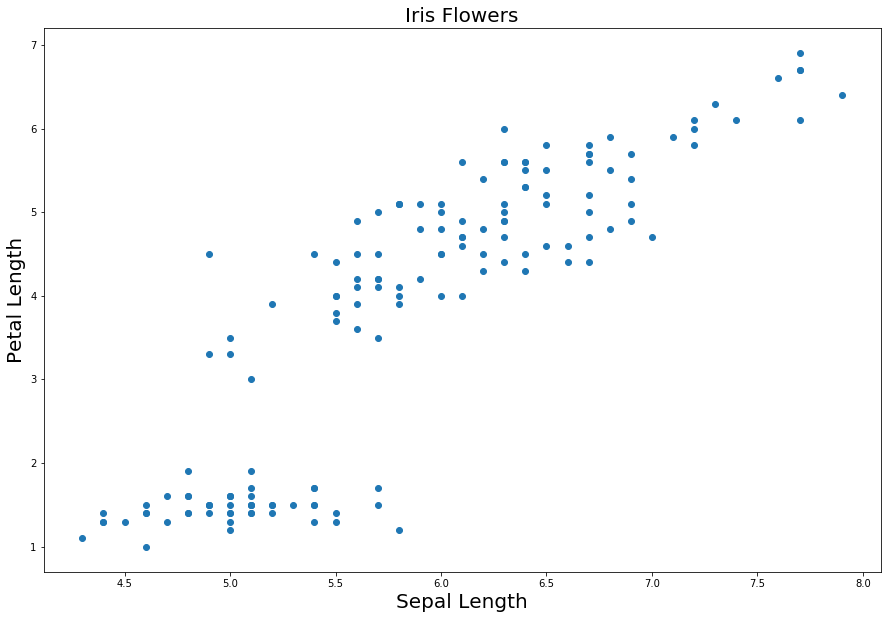

In [5]:
plt.figure(figsize=(15,10))

plt.scatter(df.sepal_length_cm, df.petal_length_cm)
plt.title('Iris Flowers', size = 20)
plt.xlabel('Sepal Length', size = 20)
plt.ylabel('Petal Length', size = 20)

## Encode labels

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [8]:
target_n = le.fit_transform(df.target)

In [9]:
target_n

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

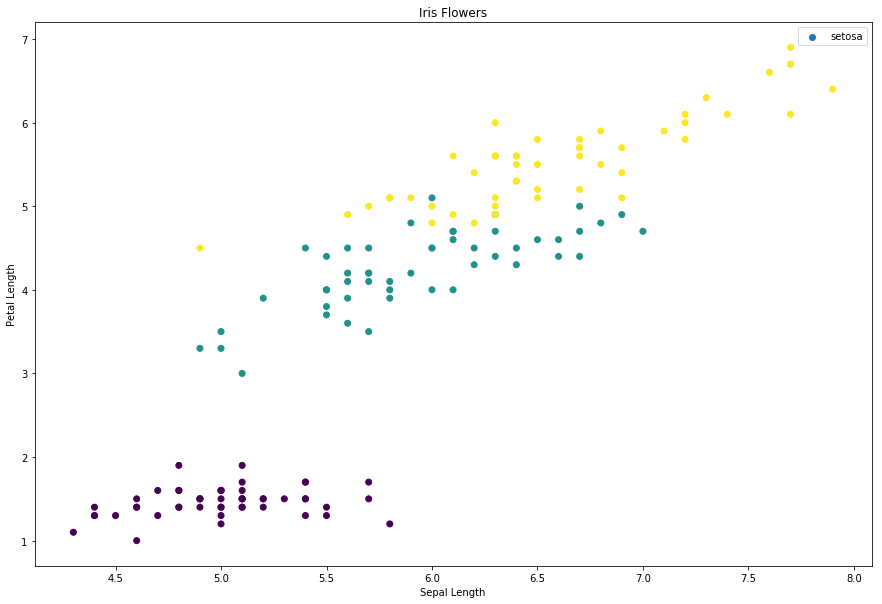

In [11]:
plt.figure(figsize=(15,10))

plt.scatter(df.sepal_length_cm, df.petal_length_cm, c=target_n)
plt.title('Iris Flowers')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(le.classes_, loc = 'best')

## Kmeans clustering

In [28]:
from sklearn.cluster import KMeans

X = df[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']]
km = KMeans(3)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
centers = km.cluster_centers_
centers

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

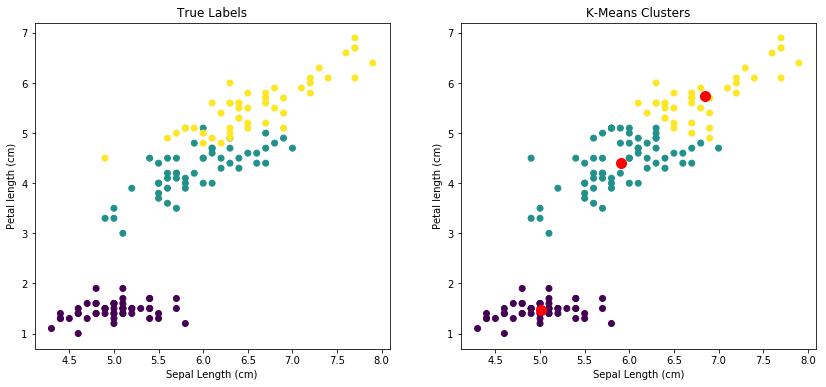

In [30]:
plt.figure(figsize = (14,6))
plt.subplot(121)
plt.scatter(df.sepal_length_cm, df.petal_length_cm, c=target_n)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('True Labels')

plt.subplot(122)
plt.scatter(df.sepal_length_cm, df.petal_length_cm, c=km.labels_)
plt.scatter(centers[:,0], centers[:,2], marker='o', c='r', s=100)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('K-Means Clusters')
plt.draw()
plt.show()


### Exercise 1
- discuss with your pair:
    - why do cluster centers have 4 coordinates?
    - do the colors in the two plots coincide? Why?
- change the number of clusters using the n_clusters parameter. What happens?
- change the initialization parameters of KMeans to 'random'. What happens?
- run the clustering multiple times, do the centroid positions change?

### Exercise 2
- calculate silhouette_score for different values of k. You will have to extract the labels from km at different values of k
- plot the silhouette score as a function of k for k between 2 and 10
- discuss with your pair:
    - what value of k gives the highest silhouette score?
    - did you expect that result?

In [32]:
from sklearn.metrics import silhouette_score
ks = range(2, 10)
sl = []
for k in ks:
    model = KMeans(k)
    model.fit(X)
    s = silhouette_score(X, model.labels_)
    sl.append(s)
    print(k, s)

2 0.6808136202936816
3 0.5525919445499757
4 0.4969928499833574
5 0.4928555918316121
6 0.37121805054590096
7 0.35596772545506455
8 0.35173499014796356
9 0.32297500076917157


### Exercise 3

Try clustering with another method of the ones you find here: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html


*Copyright &copy; 2017 Francesco Mosconi & CATALIT LLC. All rights reserved.*